Note: all ".to(device)" are deleted because Apple M1 chip does does support it.

Would recommend using Google Colab instead because it will be much faster

Source of LSTM codes:
https://github.com/quantumiracle/Popular-RL-Algorithms/blob/master/sac_v2_lstm.py

# Import packages

In [ ]:
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break


%load_ext autoreload
%autoreload 2

import sys
from data_wrangling import specific_utils, process_monkey_information, base_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils, plot_cluster_replacement
from decision_making_analysis.decision_making import decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics
from visualization.animation import animation_func, animation_utils, animation_class
from null_behaviors import sample_null_distributions, show_null_trajectory
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data, process_agent_data
from machine_learning.RL.lstm import GRU_functions, LSTM_functions, LSTM_functions, lstm_for_multiff_class
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from eye_position_analysis import eye_positions
from neural_data_analysis.neural_analysis_tools.model_neural_data import neural_data_modeling
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials
from machine_learning.RL.SB3 import rl_for_multiff_utils, rl_for_multiff_class

import os, sys
import torch
import numpy as np
import pickle
from gymnasium import spaces, Env
import torch
import optuna
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torch.linalg import vector_norm
from IPython.display import HTML
from functools import partial
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
import gc
from importlib import reload
plt.rcParams["animation.html"] = "html5"
torch.set_printoptions(sci_mode=False)
np.set_printoptions(suppress=True)

device_idx = 0
# device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
## if using Jupyter Notebook
device = "mps" if torch.backends.mps.is_available() else "cpu"
model_folder_name = "RL_models/LSTM_stored_models/all_agents/gen_0/LSTM_Aug_1_24"
os.makedirs(model_folder_name, exist_ok=True)
PLAYER = "agent"

Set up logging configuration.
Numba isn't available, making a no-op decorator


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [ ]:
stop!

# streamline everything

### oct_12

In [21]:
overall_folder = 'RL_models/LSTM_stored_models/all_agents/oct_12/'
env_kwargs = {'num_obs_ff': 5,
              'add_action_to_obs': False,
              'angular_terminal_vel': 1,
              "dt": 0.2,
              "flash_on_interval": 0.3,
              "dv_cost_factor": 0,
              "dw_cost_factor": 0,
              "w_cost_factor": 0,
              "max_in_memory_time": 1,
            }   
lm = lstm_for_multiff_class.LSTMforMultifirefly(overall_folder=overall_folder,
                                                **env_kwargs)

# lm.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
#                          best_model_after_curriculum_exists_ok=True)
                                             

model_folder_name: RL_models/LSTM_stored_models/all_agents/oct_12/dv0_dw0_w0_memT1


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/user_data/cicid/Multifirefly-Project/multiff_analysis/multiff_code/methods/machine_learning/RL/lstm/LSTM_functions.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are expl

Soft Q Network (1,2):  QNetworkLSTM2(
  (linear1): Linear(in_features=49, out_features=128, bias=True)
  (lstm1): LSTM(128, 128, dropout=0.2)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)
Policy Network:  SAC_PolicyNetworkLSTM(
  (linear1): Linear(in_features=45, out_features=128, bias=True)
  (linear2): Linear(in_features=47, out_features=128, bias=True)
  (lstm1): LSTM(128, 128, dropout=0.2)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (mean_linear): Linear(in_features=128, out_features=2, bias=True)
  (log_std_linear): Linear(in_features=128, out_features=2, bias=True)
)
There's a problem retrieving existing agent or replay_buffer found in RL_models/LSTM_stored_models/all_agents/oct_12/dv0_dw0_w0_memT1. Need to train a new agent. Error message [Errno 2] No such file or directory: 'RL_models/LSTM_stored_models/all_agents/oct_12/dv0_dw0_w0_memT1/lstm_q1'
Failed to load existing agent. Need to train a new agent. Error:  There's a problem retri

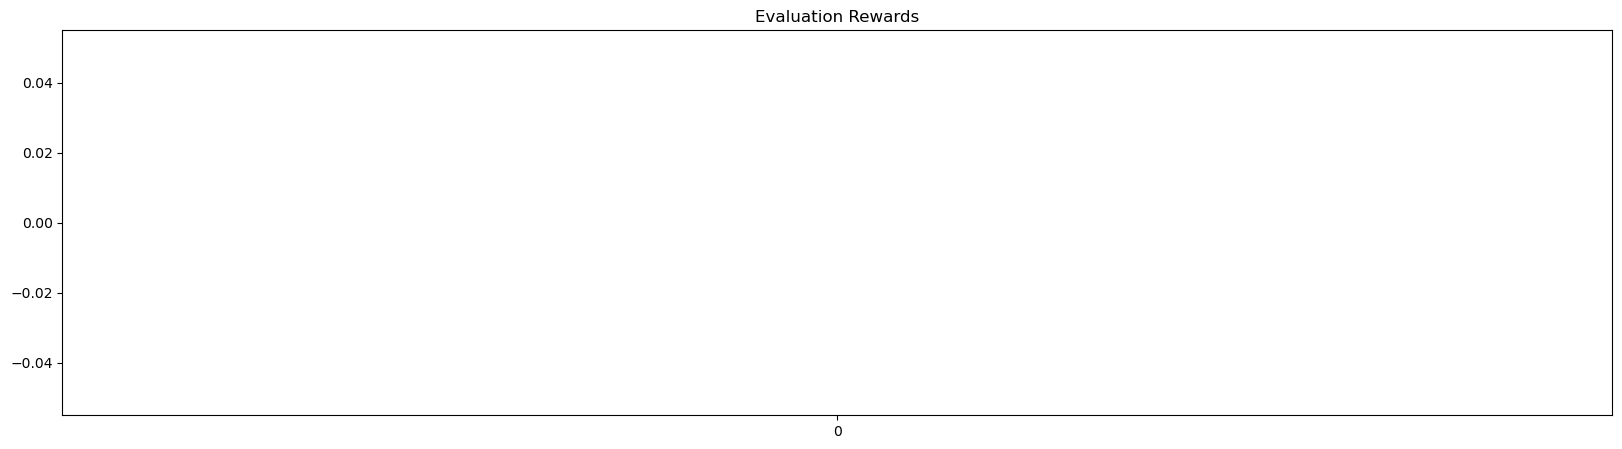

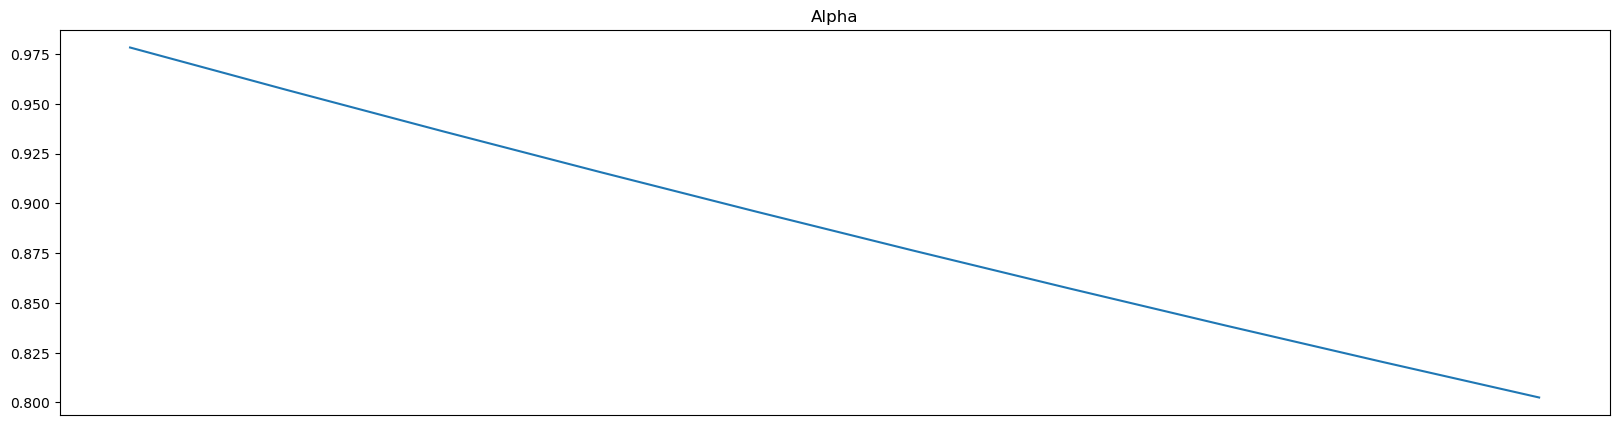

Episode: 20, Episode Reward: 55.12958908081055
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  22
225.5 action:  [0.196, -0.9872] n_targets:  1 reward:  85.64
Firely capture rate for the episode:  1 ff for 256.0 s: -------------------> 0.0
Total reward for the episode:  85.64266777038574
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  [85.64267]
ALPHA (entropy-related):  tensor([0.7850], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.95694 0.93611 0.91574 0.89581 0.87631 0.85724 0.83858 0.82034 0.80249
 0.78503]
Episode: 21, Episode Reward: 85.64266777038574
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current d

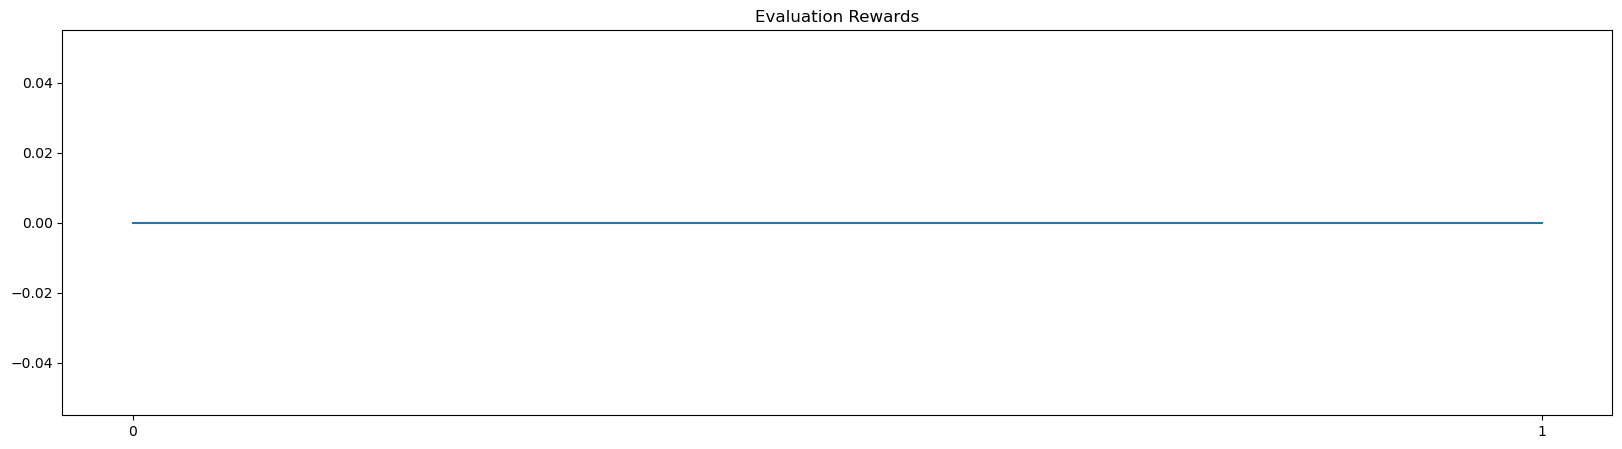

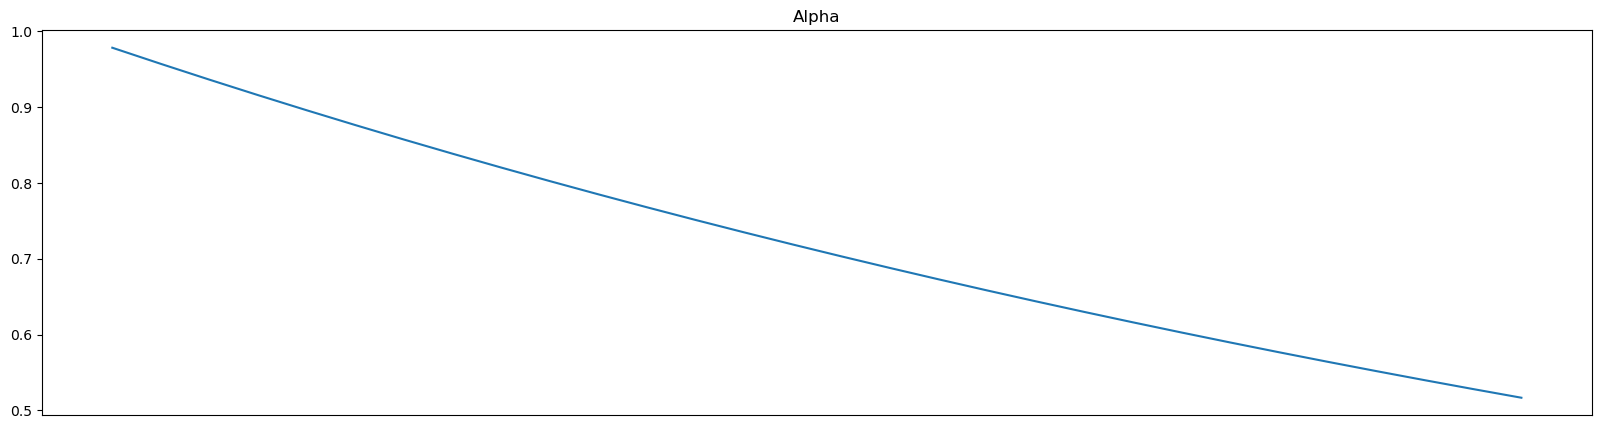

Episode: 40, Episode Reward: 0.0
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  43
60.0 action:  [0.2115, -0.9852] n_targets:  1 reward:  60.35
130.5 action:  [-0.3443, -0.9812] n_targets:  1 reward:  53.51
Firely capture rate for the episode:  2 ff for 256.0 s: -------------------> 0.01
Total reward for the episode:  113.86131286621094
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  [60.35044 53.51087]
ALPHA (entropy-related):  tensor([0.5056], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.6163  0.60288 0.58976 0.57693 0.56438 0.5521  0.54009 0.52834 0.51684
 0.50559]
Episode: 41, Episode Reward: 113.86131286621094
TIME before resetting: 256.0
current linear_terminal_vel:  0.01

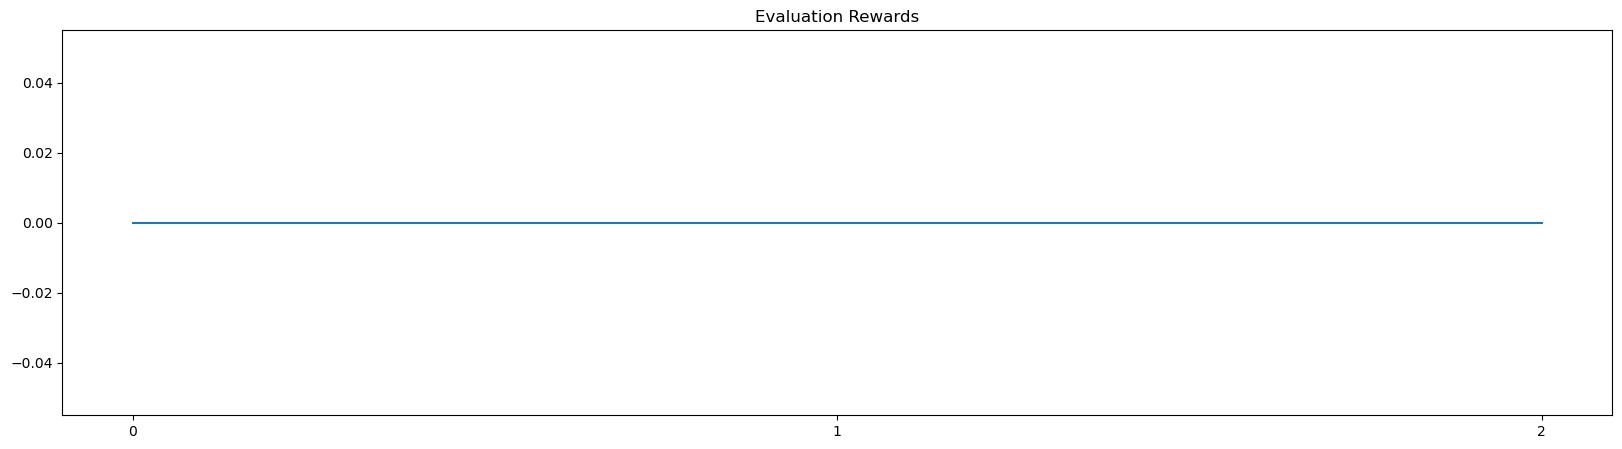

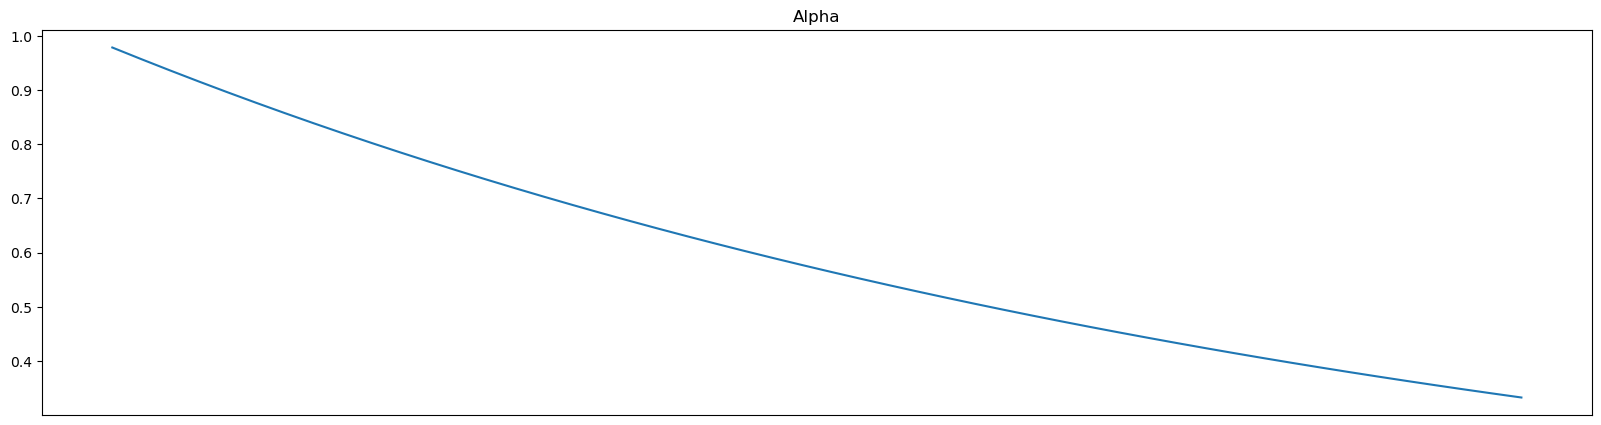

Episode: 60, Episode Reward: 145.03570556640625
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  64
170.5 action:  [-0.7482, -0.9931] n_targets:  1 reward:  84.35
Firely capture rate for the episode:  1 ff for 256.0 s: -------------------> 0.0
Total reward for the episode:  84.35121726989746
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  [84.35122]
ALPHA (entropy-related):  tensor([0.3256], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.39693 0.38829 0.37984 0.37157 0.36348 0.35557 0.34783 0.34026 0.33285
 0.32561]
Episode: 61, Episode Reward: 84.35121726989746
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
curren

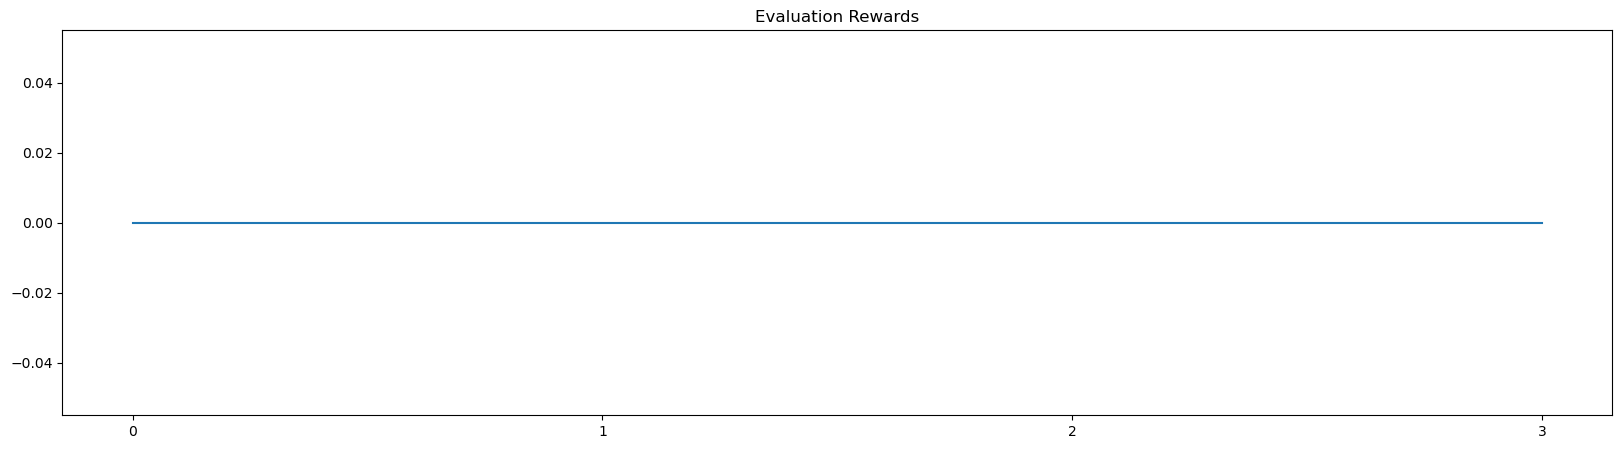

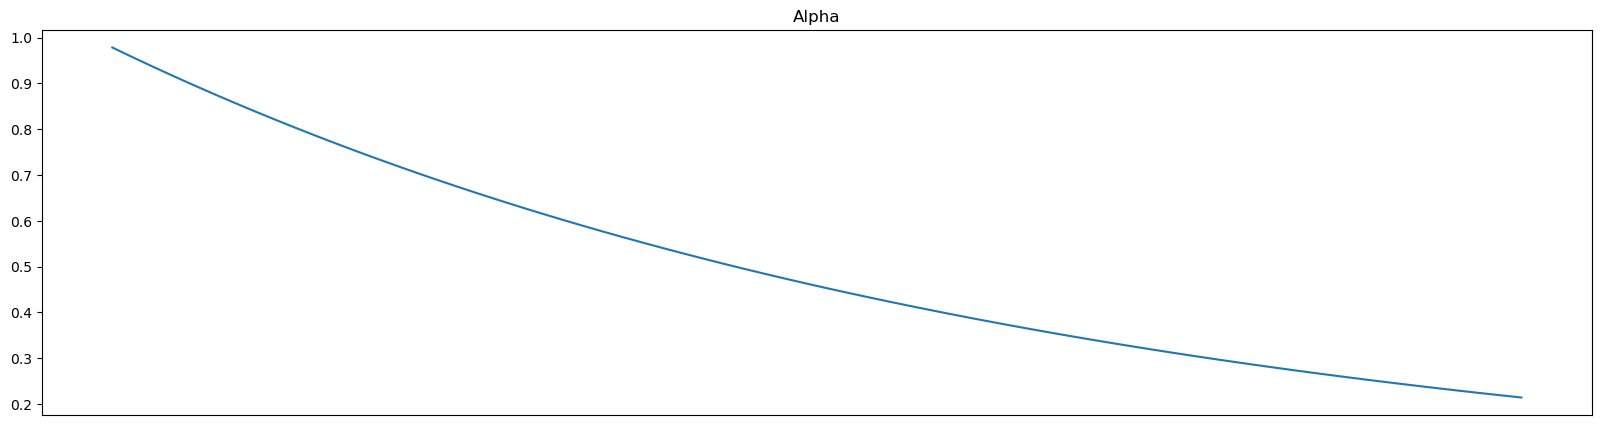

Episode: 80, Episode Reward: 53.101993560791016
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  85
Firely capture rate for the episode:  0 ff for 256.0 s: -------------------> 0.0
Total reward for the episode:  0.0
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  []
ALPHA (entropy-related):  tensor([0.2098], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.25565 0.25008 0.24464 0.23932 0.23412 0.22903 0.22405 0.21918 0.21442
 0.20976]
Episode: 81, Episode Reward: 0.0
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_c

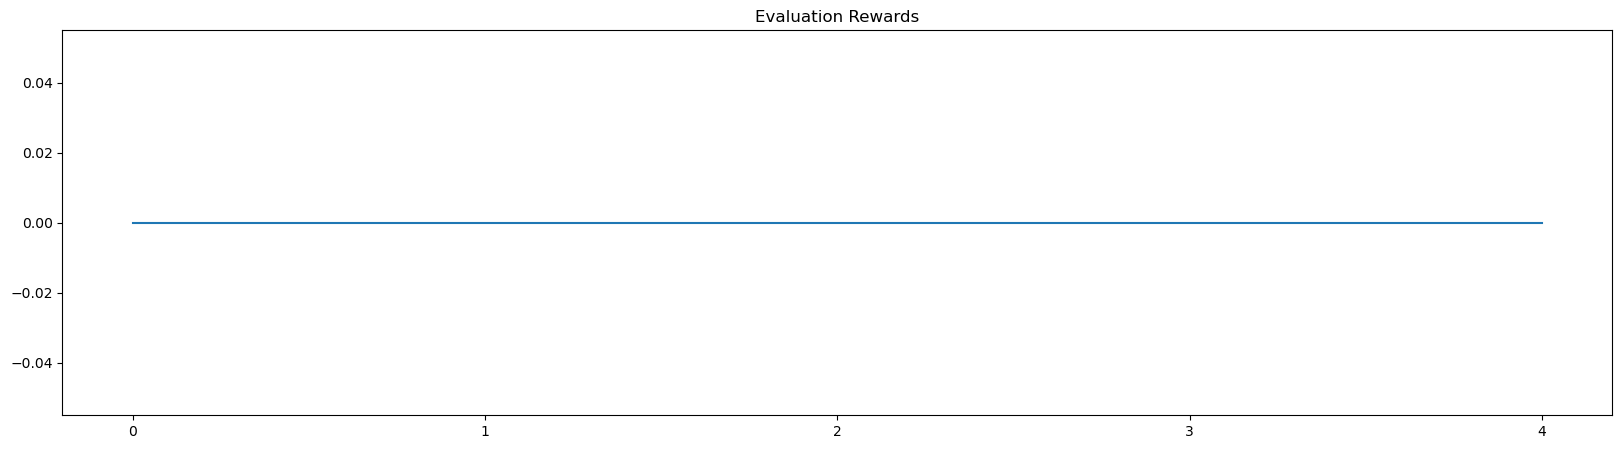

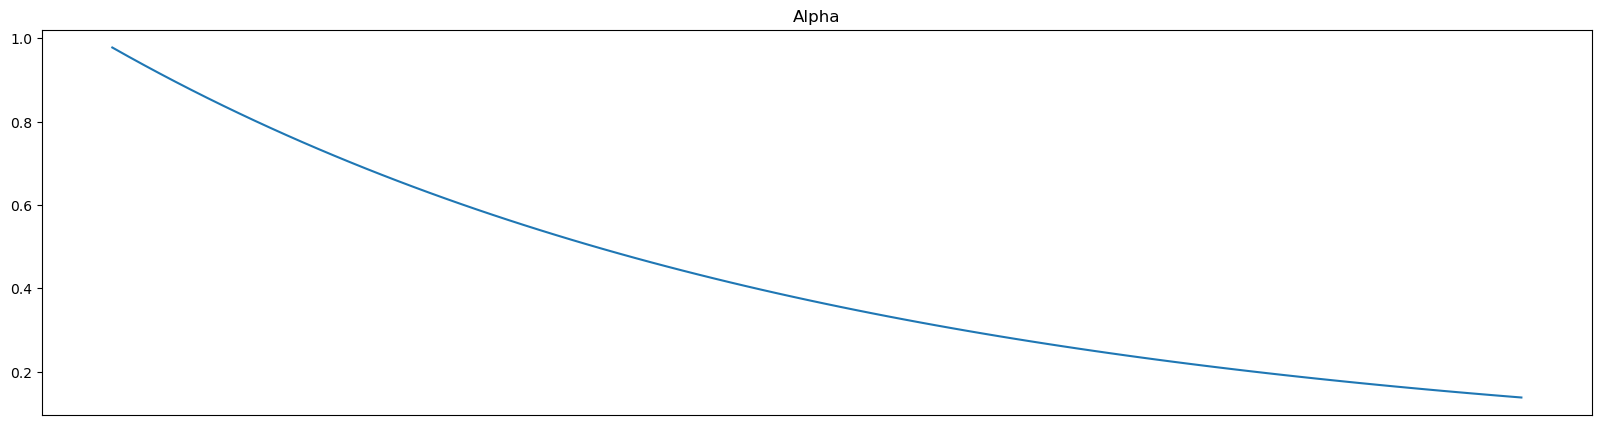

Episode: 100, Episode Reward: 67.96279907226562
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  106
Firely capture rate for the episode:  0 ff for 256.0 s: -------------------> 0.0
Total reward for the episode:  0.0
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  []
ALPHA (entropy-related):  tensor([0.1352], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.16474 0.16116 0.15766 0.15423 0.15088 0.14761 0.14441 0.14128 0.13822
 0.13523]
Episode: 101, Episode Reward: 0.0
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center

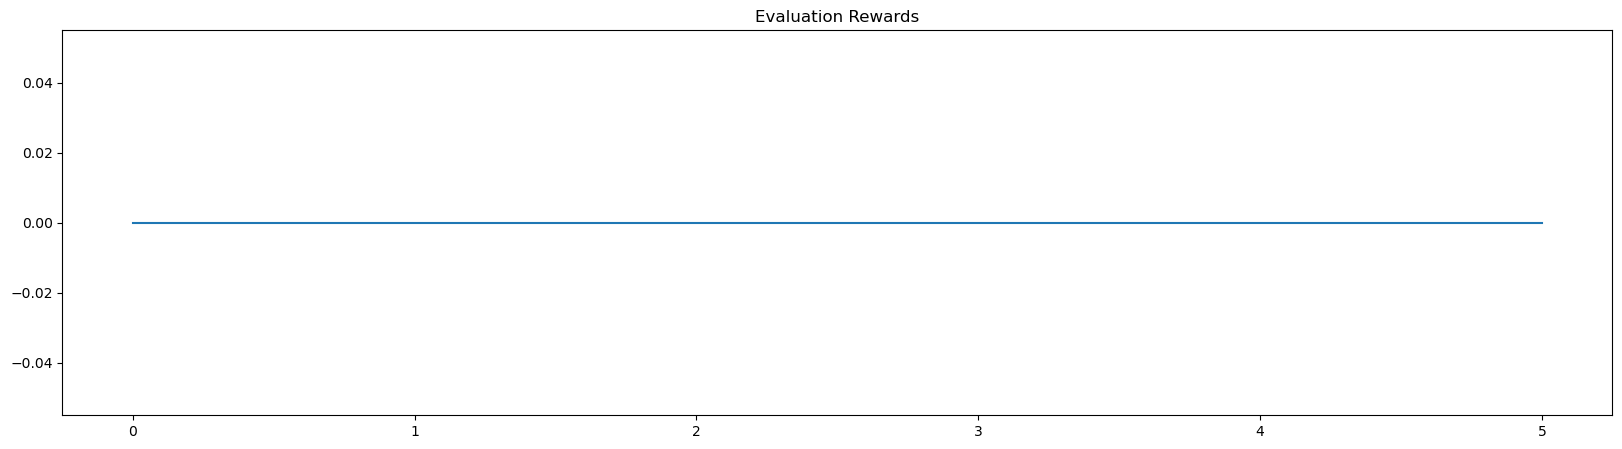

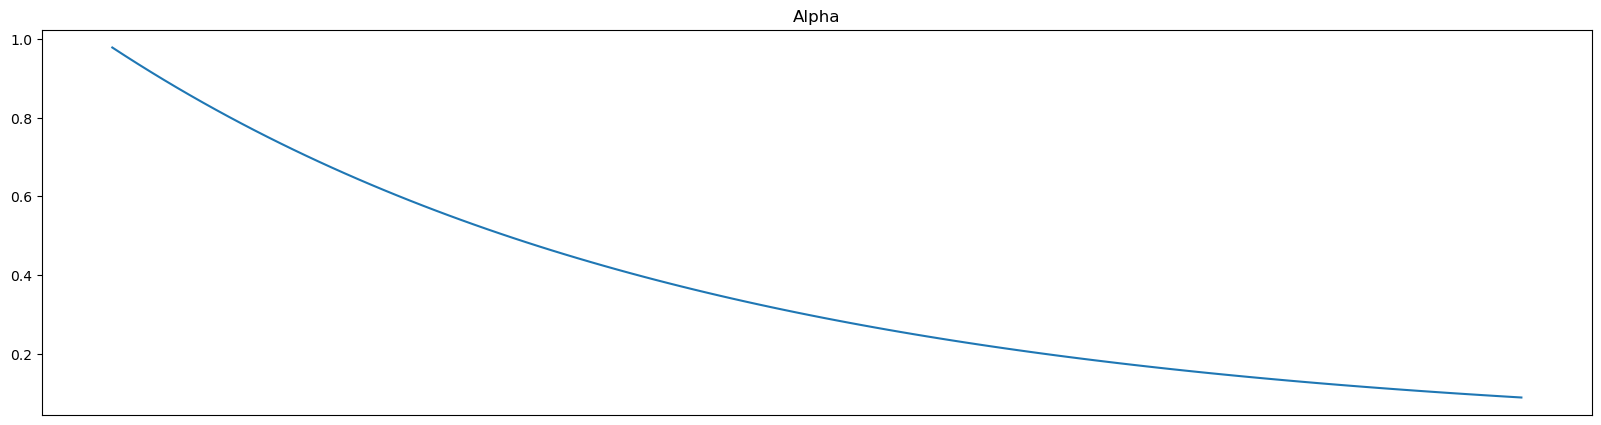

Episode: 120, Episode Reward: 271.298490524292
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  127
216.25 action:  [-0.6151, -0.991] n_targets:  1 reward:  91.23
Firely capture rate for the episode:  1 ff for 256.0 s: -------------------> 0.0
Total reward for the episode:  91.22726249694824
Cost breakdown:  {'dv_cost': 0.0, 'dw_cost': 0.0, 'w_cost': 0.0}
Reward for each ff:  [91.22726]
ALPHA (entropy-related):  tensor([0.0874], grad_fn=<ExpBackward0>)
Last 10 ALPHA: [0.10635 0.10405 0.1018  0.09961 0.09748 0.09539 0.09334 0.09132 0.08936
 0.08745]
Episode: 121, Episode Reward: 91.22726249694824
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
curre

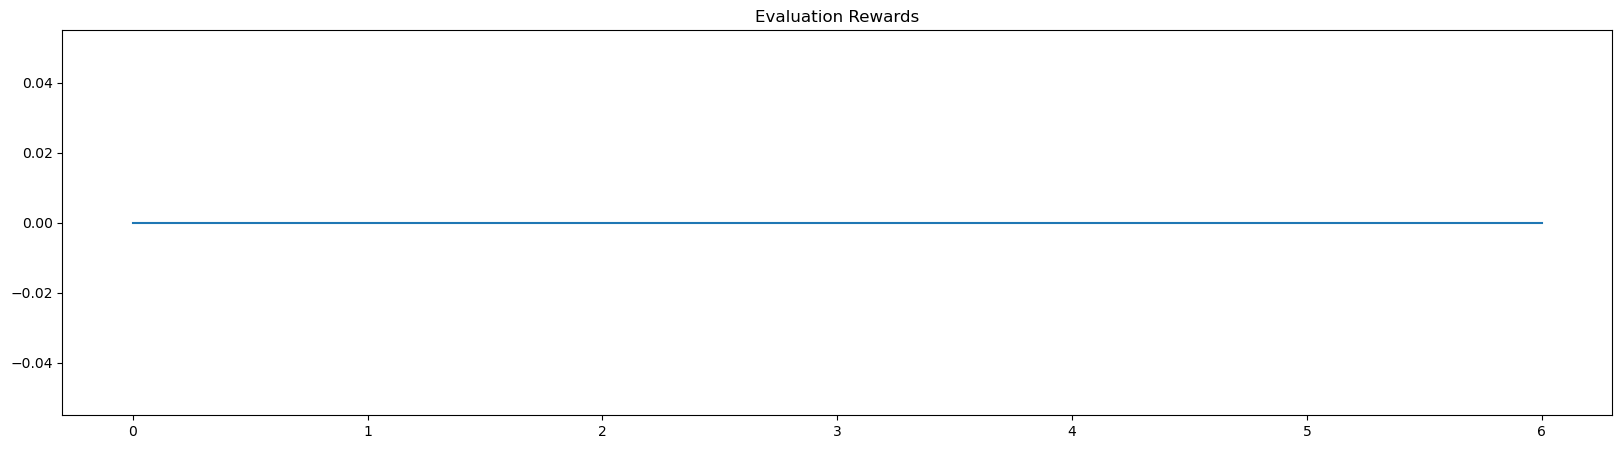

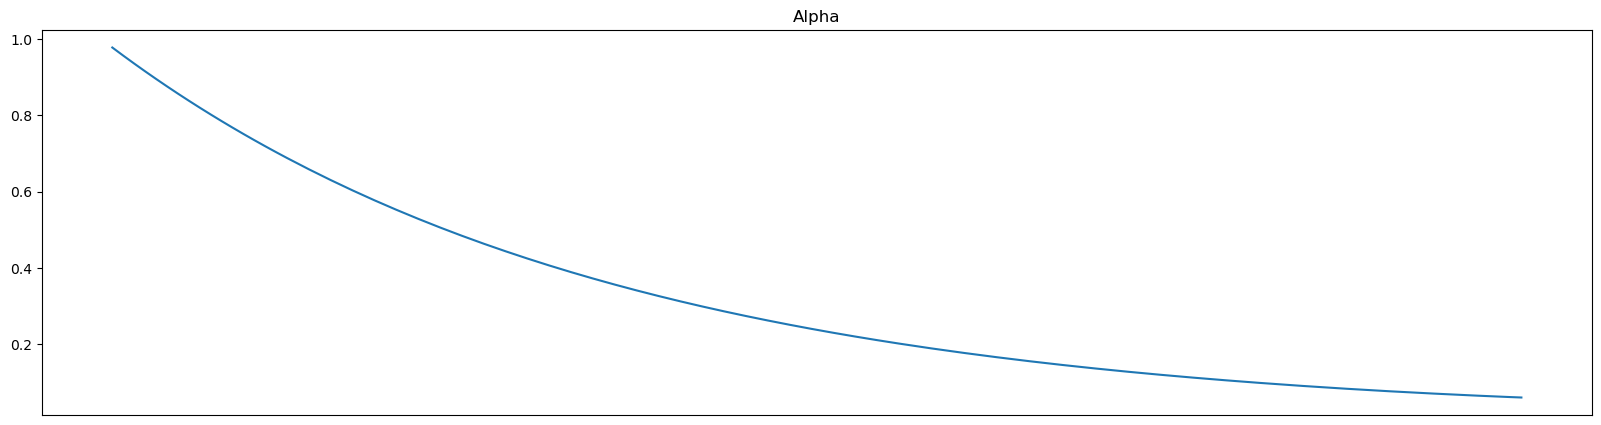

Episode: 140, Episode Reward: 821.5230112075806
TIME before resetting: 256.0
current linear_terminal_vel:  0.01
current angular_terminal_vel:  1
current dt:  0.25
current dv_cost_factor:  0
current dw_cost_factor:  0
current w_cost_factor:  0
current distance2center_cost:  2
current flash_on_interval:  3.3
current num_obs_ff:  5
current max_in_memory_time:  1

 episode:  148
54.25 action:  [0.8067, -0.9911] n_targets:  1 reward:  80.49
74.75 action:  [-0.889, -0.996] n_targets:  1 reward:  81.31
76.75 action:  [0.4621, -0.9803] n_targets:  1 reward:  80.05
114.0 action:  [0.0937, -0.9944] n_targets:  1 reward:  84.77
125.5 action:  [0.0751, -0.9831] n_targets:  1 reward:  61.84
150.5 action:  [-0.4796, -0.9936] n_targets:  1 reward:  75.29
169.75 action:  [-0.8042, -0.9954] n_targets:  1 reward:  67.61
189.5 action:  [-0.6789, -0.9804] n_targets:  1 reward:  79.72
231.0 action:  [-0.9634, -0.9846] n_targets:  1 reward:  55.52
Firely capture rate for the episode:  9 ff for 256.0 s: ----

In [ ]:
lm.streamline_everything(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40],
                         best_model_after_curriculum_exists_ok=True,
                         model_exists_ok=True,
                         to_train_agent=False)

## see animation

In [10]:
reload(rl_for_multiff_class)

<module 'machine_learning.RL.SB3.rl_for_multiff_class' from '/user_data/cicid/Multifirefly-Project/multiff_analysis/multiff_code/methods/machine_learning/RL/SB3/rl_for_multiff_class.py'>

/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/user_data/cicid/Multifirefly-Project/multiff_analysis/multiff_code/methods/machine_learning/RL/lstm/LSTM_functions.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are expl

Soft Q Network (1,2):  QNetworkLSTM2(
  (linear1): Linear(in_features=14, out_features=128, bias=True)
  (lstm1): LSTM(128, 128, dropout=0.2)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)
Policy Network:  SAC_PolicyNetworkLSTM(
  (linear1): Linear(in_features=10, out_features=128, bias=True)
  (linear2): Linear(in_features=12, out_features=128, bias=True)
  (lstm1): LSTM(128, 128, dropout=0.2)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (mean_linear): Linear(in_features=128, out_features=2, bias=True)
  (log_std_linear): Linear(in_features=128, out_features=2, bias=True)
)
Soft Q Network (1,2):  QNetworkLSTM2(
  (linear1): Linear(in_features=14, out_features=128, bias=True)
  (lstm1): LSTM(128, 128, dropout=0.2)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)
Policy Network:  SAC_PolicyNetworkLSTM(
  (linear1): Linear(in_features=10, out_features=128, bias=True)
  (linear2): Linear(in_features=12, out_features=128, bias=True

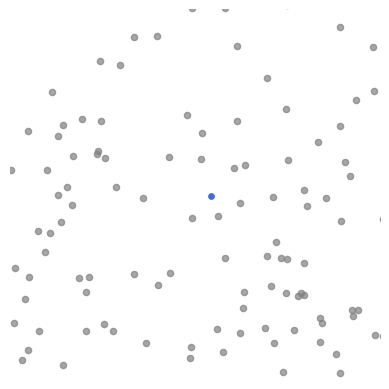

In [11]:
# lm.make_env(**lm.env_kwargs)
lm.make_initial_env_for_curriculum_training()
lm.make_agent()
lm.load_best_model_after_curriculum()
lm.streamline_making_animation(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40], n_steps=1000, video_dir=None)

In [12]:
from IPython.display import Video
Video(lm.video_path_name, embed=True)

# class

In [ ]:
# # retrieve old model
# env_kwargs = {'num_obs_ff': 2,
#               'add_action_to_obs': False,
#               'angular_terminal_vel': 1,
#               "reward_per_ff": 100,
#           
#               "dv_cost_factor": 0,
#               "dw_cost_factor": 0,
#               "w_cost_factor": 0,
#               "dt": 0.25,
#               "flash_on_interval": 0.3
#             }


# lm = lstm_for_multiff_class.LSTMforMultifirefly(overall_folder='RL_models/LSTM_stored_models/all_agents/gen_-1/',
#                                                 model_folder_name='RL_models/LSTM_stored_models/all_agents/gen_-1/LSTM_Jan_2',
#                                                 )


In [ ]:

env_kwargs = {'num_obs_ff': 3,
              'add_action_to_obs': False,
              'angular_terminal_vel': 1,
              "reward_per_ff": 80,
          
              "dv_cost_factor": 0,
              "dw_cost_factor": 0,
              "w_cost_factor": 0,
              "dt": 0.25,
              "flash_on_interval": 0.3
            }   
lm = lstm_for_multiff_class.LSTMforMultifirefly(overall_folder='RL_models/LSTM_stored_models/all_agents/gen_1_3ff/',
                                                **env_kwargs)

                                             

In [ ]:
# lm = lstm_for_multiff_class.LSTMforMultifirefly()

env_kwargs = {
              'num_obs_ff': 10,
              'add_action_to_obs': False,
              'angular_terminal_vel': 1,
              "dt": 0.25,
              "flash_on_interval": 0.3,
          
              "dv_cost_factor": 0,
              "dw_cost_factor": 0,
              "w_cost_factor": 0,
            }   

lm = lstm_for_multiff_class.LSTMforMultifirefly(overall_folder='RL_models/LSTM_stored_models/all_agents/gen_8_env2/',
                                                
                                                **env_kwargs)


In [ ]:
lm.make_env(**env_kwargs)

In [ ]:
lm.make_agent()

In [ ]:
lm.train_agent()

In [ ]:
lm.save_agent()

In [ ]:
lm.load_agent(load_replay_buffer=False)

In [ ]:
lm.test_agent()

In [ ]:
lm.monkey_information

In [ ]:
lm.ff_dataframe['time']

## animation

In [ ]:
# curriculum_training kwargs
env_kwargs = {
              
              'angular_terminal_vel': 1,
              "reward_per_ff": 100,
          
              "dv_cost_factor": 0,
              "dw_cost_factor": 0,
              "w_cost_factor": 0,
              "dt": 0.25,
              "flash_on_interval": 2.1
            }
lm.env_kwargs.update(env_kwargs)

In [ ]:
# curriculum_training kwargs
env_kwargs = {
              
              'angular_terminal_vel': 1,
              "reward_per_ff": 100,
          
              "dv_cost_factor": 0,
              "dw_cost_factor": 0,
              "w_cost_factor": 0,
              "dt": 0.25,
              "flash_on_interval": 2.1
            }
lm.env_kwargs.update(env_kwargs)

lm.streamline_making_animation(currentTrial_for_animation=None, num_trials_for_animation=None, duration=[10, 40], n_steps=1000, video_dir=None)

# Optuna (LSTM)

(my own codes)

##### sample_sac_params

In [ ]:
def sample_sac_params(trial):
    """
    Sampler for SAC hyperparams.
    :param trial: (optuna.trial)
    :return: (dict)
    """
  
    gamma = 1.0 - trial.suggest_float("1-gamma", 1e-4, 0.1, log=True)
    soft_q_lr = trial.suggest_float("soft_q_lr", 1e-5, 1, log=True)
    policy_lr = trial.suggest_float("policy_lr", 1e-5, 1, log=True)
    alpha_lr  = trial.suggest_float("alpha_lr", 1e-5, 1, log=True)
    batch_size  = trial.suggest_categorical('batch_size', [5, 10, 15, 20, 25, 30])
    update_itr = trial.suggest_categorical('update_itr', [1, 2, 3, 5])
    hidden_dim = trial.suggest_categorical('hidden_dim', [16, 32, 64, 100, 150, 200, 256])
    reward_scale = trial.suggest_categorical('reward_scale', [1, 3, 5, 10, 15, 20]) # I updated after running
    target_entropy = trial.suggest_categorical('target_entropy', [-1, -2, -3, -5, -8, -10]) # I updated after running
    soft_tau= trial.suggest_float("soft_tau", 1e-6, 1, log=True)
    #activation_fn


    return {
        'gamma': gamma,
        'soft_q_lr':soft_q_lr,
        'policy_lr':policy_lr,
        'alpha_lr':alpha_lr,
        'batch_size': batch_size,
        'update_itr':update_itr,
        'hidden_dim': hidden_dim,
        'reward_scale':reward_scale,
        'target_entropy':target_entropy,
        'soft_tau':soft_tau
    }

## put_in_fixed_params

In [ ]:
def put_in_fixed_params():
    return {
        'model_folder_name':  None, 
        'train_freq': 100, 
        'batch_size': 10, 
        'update_itr': 1,
        'num_train_episodes': 50, 
        'eval_eps_freq': 10, 
        'max_steps_per_eps': 1024, 
        'auto_entropy': True, 
        'DETERMINISTIC': False, 
        'num_eval_episodes': 3, 
        'print_episode_reward':  True}

## objective

In [ ]:
def objective(trial: optuna.Trial) -> float: 
  try:
    # Sample hyperparameters
    kwargs = sample_sac_params(trial)
    kwargs = put_in_fixed_params()

    num_train_episodes = kwargs['num_train_episodes'] 
    eval_eps_freq = kwargs['eval_eps_freq']
    max_steps_per_eps = kwargs['max_steps_per_eps'] 
    auto_entropy = kwargs['auto_entropy'] 
    num_eval_episodes = kwargs['num_eval_episodes'] 
    print_episode_reward = kwargs['print_episode_reward']


    env = env_for_lstm.EnvForLSTM()
    sac_model = LSTM_functions.SAC_Trainer(**kwargs)

    sac_model, best_avg_reward_record, alpha_df = LSTM_functions.train_LSTM_agent(env, sac_model, device,
                                                         num_train_episodes=num_train_episodes, eval_eps_freq=eval_eps_freq, max_steps_per_eps=max_steps_per_eps, 
                                                         num_eval_episodes=num_eval_episodes, print_episode_reward=print_episode_reward, auto_entropy=auto_entropy)

  except ValueError as e:
    # Sometimes, random hyperparams can generate NaN
      print(e)

  return best_avg_reward_record

## run

In [ ]:
N_TRIALS = 100
N_STARTUP_TRIALS = 5

# Set pytorch num threads to 1 for faster training
torch.set_num_threads(1)
 
sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
## Do not prune before 1/3 of the max budget is used
# pruner = MedianPruner(n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=N_EVALUATIONS 2//3 3)

study = optuna.create_study(sampler=sampler, direction="maximize")
try:
    study.optimize(objective, n_trials=N_TRIALS)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print("    {}: {}".format(key, value))

# Animation

## collect data

In [ ]:
env = env_for_sb3.CollectInformationLSTM()
env.flash_on_interval = 0.3
env.distance2center_cost = 0
sac_model.load_model(model_folder_name)

env._run_agent_to_collect_data()


## prepare for animation

In [ ]:
currentTrial = 2
num_trials = 7
k = 1
fig, ax = plt.subplots()
num_frames, anim_monkey_info, flash_on_ff_dict, alive_ff_dict, believed_ff_dict, new_num_trials, ff_dataframe_anim \
            = animation_utils.prepare_for_animation(ff_dataframe, ff_caught_T_new, ff_life_sorted, ff_believed_position_sorted, 
            ff_real_position_sorted, ff_flash_sorted, monkey_information, k=k, currentTrial=currentTrial, num_trials=num_trials)
print("Number of frames is:", num_frames)

## make animation

In [ ]:
animate_func = partial(animation_func.animate, ax=ax, anim_monkey_info=anim_monkey_info, ff_dataframe_anim=ff_dataframe_anim, ff_real_position_sorted=ff_real_position_sorted, \
                         flash_on_ff_dict=flash_on_ff_dict, alive_ff_dict=alive_ff_dict, believed_ff_dict=believed_ff_dict, margin = 400)
anim = animation.FuncAnimation(fig, animate_func, frames=num_frames, interval=100, repeat=True) 
HTML(anim.to_html5_video())

## make animation with annotation

In [ ]:
annotation_info = animation_utils.make_annotation_info(caught_ff_num+1, max_point_index, n_ff_in_a_row, visible_before_last_one_trials, disappear_latest_trials, \
                                        ignore_sudden_flash_indices, give_up_after_trying_indices, try_a_few_times_indices)
animate_annotated_func = partial(animation_func.animate_annotated, ax=ax, anim_monkey_info=anim_monkey_info, margin=margin, ff_dataframe=ff_dataframe, \
                                   flash_on_ff_dict=flash_on_ff_dict, alive_ff_dict=alive_ff_dict, believed_ff_dict=believed_ff_dict, ff_caught_T_new=ff_caught_T_new, annotation_info=annotation_info)
anim_annotated = animation.FuncAnimation(fig, animate_annotated_func, frames=num_frames, interval=100, repeat=True) 
HTML(anim_annotated.to_html5_video())

# Debug